In [12]:
import numpy as np

In [13]:
#Question 2a

A = np.array([[6,2,-5],[3,3,-2],[7,5,-3]])
B = np.array([13,13,26])
# Approach used here (A-1 is A inverse)
# (A).(A-1).X = B.(A-1)
# A. (A-1) = I --- identity matrix 
# X = B.(A-1)

# find A inverse
C = np.linalg.inv(A)
# Find Dot product i.e B.(A-1)
D = np.dot(B,C)
print("X = ",D[0],", Y = ",D[1],", Z = ",D[2])

X =  -7.999999999999998 , Y =  -16.999999999999996 , Z =  15.999999999999996


In [14]:
#Question 2b
# Rank of Submatrix 'A' (r X r) is 'r' when determinant is non zero i.e |A| != 0 and 
# there exits submatrix 'B' ((r+1) X (r+1)) whose determinant is zero i.e. |B| = 0

# my roll ID "2023baml034"
M = np.array([[0,2,-3],[1,3,6],[4,5,4]])
r = np.linalg.matrix_rank(M)
print("Rank of Matrix M = ", r)

Rank of Matrix M =  3


Coefficient value =  [7891.23443542]
Intercept value =  27369.018118207532
Mean Square Error =  72694014.1545995
Root Mean Square Error =  8526.078474574317
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


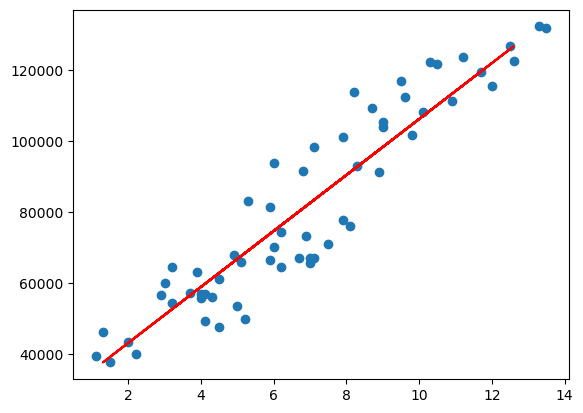

In [29]:
#Question 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create dataFrame of CSV
df = pd.read_csv("Salary_Data-1.csv")
df.head()
#df.tail()
#df.shape
df.columns

# Features
X = df.iloc[:,0:1]
#target variable
y = df.iloc[:,-1]

# divide the dataset into Train and test data. Divide such a way that Test data would be 20% of the whole data.
# Also randomness while dividing the data.
# random_state value 6 is selected based on less MSE value. 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=6)

X_train
X_test

lr = LinearRegression()

lr.fit(X_train,y_train)
plt.scatter(df["YearsExperience"],df["Salary"])

plt.plot(X_train,lr.predict(X_train),color='red')


#Lets predict X_test dataset values which can be used to identify the error. 
y_pred = lr.predict(X_test)
y_test.values
print("Coefficient value = " ,lr.coef_)
print("Intercept value = ",lr.intercept_)
# using y_test( Expected value) and y_pred( Actual values) lets find the error value
print("Mean Square Error = ",mean_squared_error(y_test, y_pred))
print("Root Mean Square Error = ",np.sqrt(mean_squared_error(y_test,y_pred)))


X.info()

In [89]:
#Explaination of Que # 3 
# Error value represent the difference between actual observed value and expected value.
# As error value is non zero mean  "Salary" is not just depend on "YearsExperience" but on other paramters too. 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (990,) + inhomogeneous part.

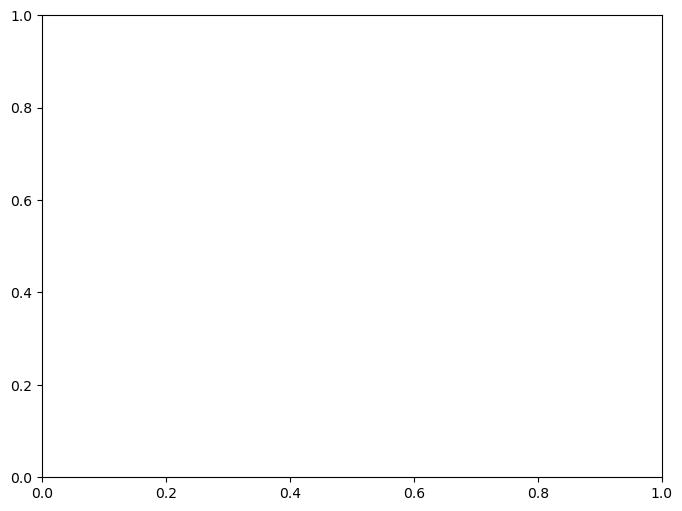

In [43]:
#gradent Descent

##Calcualte Cost
def calculate_cost(predicted, actual):
    return np.sum((predicted - actual)**2)/len(actual);

 
## Gradient function. 
## here initialize coeficient, intercept
def calculate_gradient(X, Y,itreations=990, learning_rate = 0.0001,stopping_threshold = 1e-6):
    
    w0 = 0.1
    w1 = 0.1
    prev_cost = None
    n = float(len(Y))
    costs = []
    weights = []
    
    #iterate through gradient function to find minimum coefficient , intercept
    
    for i in range(itreations):
        #Calculate Y Predict
        Y_Predict = w0 + (w1 * X)
        #Find the Cost
        current_cost = calculate_cost(Y_Predict, Y)
        
        #here stop the decent if condition is met i.e. previous and current cost differen is less than equal to stopping_threshold
        if prev_cost and abs(prev_cost - current_cost) <= stopping_threshold:
            print("reached threshold")
            break
        
        
        #If error difference is greater than stopping_threshold then continue
        
        costs.append(current_cost)
        weights.append(w1)
        #Calculate new w0 by applying gradient function
        type(Y_Predict)
        type(Y)
        w0 = w0 - (learning_rate * (-2/n) *  np.sum(Y_Predict - Y ))
        w1 = w1 - (learning_rate * (-2/n) * np.sum(X * (Y_Predict - Y)))
    
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    return w0,w1


w0, w1 = calculate_gradient(X,y)

#print("Intercept",w0)
#print("Coefficient",w1)
print(f"Estimated Weight: {w1}\nEstimated Bias: {w0}")

# Making predictions using estimated parameters
Y_pred = w1*X + w0
       
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
